In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
data = np.random.random_integers(1, 40, 40).reshape(20,2)
data

/var/folders/4g/xybm8dd91pg7cjxkwg1lqh5m0000gn/T/ipykernel_5858/1883032183.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 40 + 1) instead
  data = np.random.random_integers(1, 40, 40).reshape(20,2)


array([[ 2, 16],
       [24,  6],
       [34, 29],
       [18, 17],
       [27, 17],
       [ 6, 32],
       [36, 33],
       [ 1, 24],
       [20, 39],
       [25, 28],
       [21, 16],
       [24, 30],
       [ 4, 19],
       [35, 35],
       [29,  4],
       [23, 30],
       [27, 25],
       [25,  9],
       [ 5,  4],
       [28, 12]])

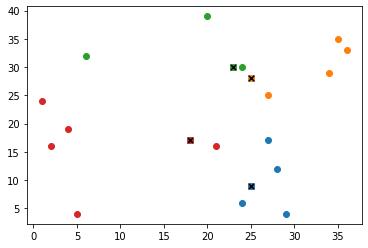

centroids_dist_old_new_diff : [1.7088007490635073, 6.705221845696083, 5.488624600025037, 9.5524865872714]


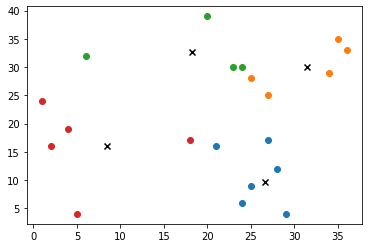

centroids_dist_old_new_diff : [1.4173527750312866, 0.0, 0.0, 2.5]


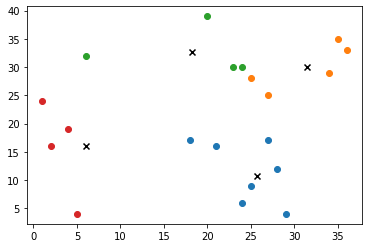

centroids_dist_old_new_diff : [1.4206127514453617, 0.0, 0.0, 3.010398644698074]


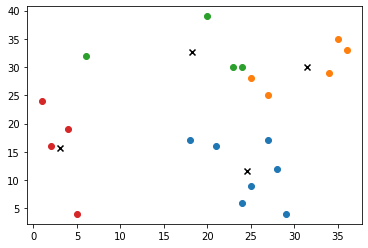

centroids_dist_old_new_diff : [0.0, 0.0, 0.0, 0.0]


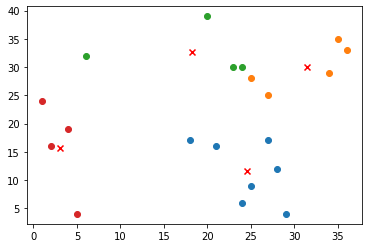

(25.226223343722264, 4)

In [3]:
def k_means(k, data):
    
    # make sure the data is ndarray
    data = np.array(data)
    
    # create an empty arrays for current centeroids and previous centeroids
    centeroids = np.empty((k, data.shape[1]))
    old_centeroids = np.empty((k, data.shape[1]))
    
    # create an empty dictionary later will be updated with each centeroid as key and list of the nearest points
    # as values
    centeroid_points = {}
    
    # create an empty dictionary later will be updated with each centeroid as key and the distance between each 
    # point
    distances = {}
    
    # Root mean squared Error
    RMSE = 0 
    
    # number of iterations to converge 
    iterations = 0
    
    # init centeroids with unique random values
    random_indexs = np.random.choice(np.arange(data.shape[0]), size=k, replace=False)
    for index, rd_index in enumerate(random_indexs):
        centeroids[index] = data[rd_index]
        old_centeroids[index] = data[rd_index]
    
    # Loop until converge 
    while(True):  
        # reset all the variables at the start of each iteration
        centeroid_points={}
        centroids_dist_old_new_diff = []
        distances = {}
        
        iterations += 1
        
        # loop over each point to check which cluster it belongs to
        for point in data:
            # to keeb track of all the centeroids distance from that point
            min_dist = []
            # Loop over the centeroids to get the distance between each one and the point 
            for i in np.arange(k):
                if i not in distances.keys():
                    distances[i] = []
                if i not in centeroid_points.keys():
                    centeroid_points[i] = [] 
                
                min_dist.append(np.sqrt(np.sum((point - centeroids[i])**2)))
                
            # get the index of the min distance between centeroids and that point to add it to the dict
            distances[min_dist.index(min(min_dist))].append(min(min_dist))
            centeroid_points[min_dist.index(min(min_dist))].append(point)
        
        # plot each cluster with centeroids and update the centeroids with average 
        for key in centeroid_points.keys():
            plt.scatter(np.array(centeroid_points[key])[:,0], np.array(centeroid_points[key])[:,1])
            plt.scatter(np.array(centeroids[key])[0], np.array(centeroids[key])[1], marker='x', c='black')
            old_centeroids[key] = centeroids[key]
            centeroids[key] = np.array(centeroid_points[key]).mean(axis=0)
            centroids_dist_old_new_diff.append(np.sqrt(np.sum((old_centeroids[key] - centeroids[key])**2)))
        plt.show()

        # check the differance between the current and the new centeroid isn't zero to get to the next iteration
        # if the differance is zero I will return with number of iterations and with RMSE values
        print('centroids_dist_old_new_diff :', centroids_dist_old_new_diff)
        if sum(centroids_dist_old_new_diff) == 0:
            for key in centeroid_points.keys():
                plt.scatter(np.array(centeroid_points[key])[:,0], np.array(centeroid_points[key])[:,1])
                plt.scatter(np.array(centeroids[key])[0], np.array(centeroids[key])[1], marker='x', c='red')
                RMSE += np.sqrt(np.array(distances[key]).mean()**2)
            plt.show()
            return RMSE, iterations


k_means(4, data)